# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

## Inicialização

In [ ]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st


## Carregue os dados

In [ ]:
# Carregue os arquivos de dados em diferentes DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


In [ ]:
#verificando as primeiras linhas e as informações do dataframe:
print(df_calls.head(5))
print()
df_calls.info()

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
print(df_internet.head(5))
print()
df_internet.info()

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
print(df_messages.head(5))
print()
df_messages.info()

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
print(df_plans.head())
print()
df_plans.info()

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pl

In [ ]:
print(df_users.head(5))
print()
df_users.info()


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null   

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

In [ ]:
print(df_calls.head())
print()
df_calls.info()

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
#Pode-se converter a coluna call_date para o tipo "datetime" ao invés de object
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [ ]:
#Pode-se fazer o mesmo para outras colunas dos outros dataframes
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [ ]:
print(df_users['churn_date'])

0     NaT
1     NaT
2     NaT
3     NaT
4     NaT
       ..
495   NaT
496   NaT
497   NaT
498   NaT
499   NaT
Name: churn_date, Length: 500, dtype: datetime64[ns]


In [ ]:
# For pra verificar valores ausentes em todos os dfs
dfs = {
    'Chamadas': df_calls,
    'Internet': df_internet,
    'Mensagens': df_messages,
    'Planos': df_plans,
    'Usuários': df_users
}

for name, df in dfs.items():
    print(f"{name}:")
    print(df.isna().sum())
    print()

Chamadas:
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Internet:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Mensagens:
id              0
user_id         0
message_date    0
dtype: int64

Planos:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Usuários:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64



## Planos

In [ ]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
#já usei o método info() nas células anteriores, vou utilizar o .describe() para ver outras informações
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [ ]:
# Imprima uma amostra de dados dos planos
print(df_plans.info())
print()
df_plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corrija os dados

No dataframe de Planos, consta apenas 2 registros. Há colunas que indicam o preço mensal, os limites incluídos no pacote e os valores que são cobrados por uso adicional. Ele não apresenta valores ausentes e os tipos de dados estão adequados. Logo não será necessário realizar nenhuma limpeza neste df. Pode-se observar também que não são linhas duplicadas.

## Enriqueça os dados

Não há necessidade por enquanto, pois a tabela já está completa.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os métodos `info()` e `head()` foram utilizados para estudo inicial do conjunto de dados
- As colunas foram convertidas para os tipos de dados adequados

</div>

## Usuários

In [ ]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
print(df_users.info())
print()
df_users.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None



,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [ ]:
# Imprima uma amostra de dados dos usuários

df_users.sample(n=10, random_state=5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
241,1241,Lala,Walls,24,"Richmond, VA MSA",2018-08-27,surf,NaT
448,1448,Elayne,Foley,33,"Urban Honolulu, HI MSA",2018-10-17,surf,NaT
75,1075,Salena,Bates,35,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-06,surf,NaT
212,1212,Alfredo,Pruitt,36,"Austin-Round Rock-Georgetown, TX MSA",2018-07-27,surf,NaT
481,1481,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,surf,NaT
280,1280,Jasper,Berry,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,NaT
474,1474,Randee,Carpenter,26,"Bakersfield, CA MSA",2018-08-26,surf,NaT
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
222,1222,Cleo,Anderson,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-27,surf,NaT


Temos alguns valores 'NaT' na coluna 'churn_date', ou seja, esses valores representam clientes que ainda estão ativos e não cancelaram o plano, portanto esses valores não representam erro e não precisam ser removidos ou substituídos.

### Corrija os dados

Podemos corrigir os valores ausentes presentes na coluna 'churn_date' no dataframe de usuários

In [ ]:
df_users['churn_date'].head(10)

0          NaT
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6   2018-12-18
7          NaT
8          NaT
9          NaT
Name: churn_date, dtype: datetime64[ns]

Pode-se observar que temos alguns valores 'NaT', na coluna 'churn_date'. Sabe-se que essa coluna representa a data que o usuário parou de usar o serviço (se o valor estiver ausente, isso significa que o plano estava em uso quando o banco de dados foi extraído). Logo iremos alterar todos os valores ausentes por "Ativo".

In [ ]:
df_users['churn_date'] = df_users['churn_date'].fillna('Ativo')

df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


A coluna 'churn_date' voltou para o tipo 'object'. Pode-se criar uma outra coluna para facilitar o entendimento da situação dos nossos clientes, pra saber se eles estão ativos ou se já cancelaram o serviço.

In [ ]:
# Voltando a coluna 'churn_date' novamente pra datetime
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors='coerce')

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [ ]:
# Cria uma coluna 'status'
df_users['status'] = 'Cancelado'

# Substitui onde churn_date é nulo
df_users.loc[df_users['churn_date'].isna(), 'status'] = 'Ativo'

df_users[['user_id', 'plan', 'churn_date', 'status']].head(10)

,user_id,plan,churn_date,status
0,1000,ultimate,NaT,Ativo
1,1001,surf,NaT,Ativo
2,1002,surf,NaT,Ativo
3,1003,surf,NaT,Ativo
4,1004,surf,NaT,Ativo
5,1005,surf,NaT,Ativo
6,1006,ultimate,2018-12-18,Cancelado
7,1007,surf,NaT,Ativo
8,1008,ultimate,NaT,Ativo
9,1009,surf,NaT,Ativo


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   status      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


Os 34 valores não nulos estão corretos e esperados, pois representam os clientes que cancelaram

In [ ]:
##verificando o número de duplicados!
df_users.duplicated().sum()

0

## Chamadas

In [ ]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
df_calls.info()
print()
df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB



,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [ ]:
# Imprima uma amostra de dados das chamadas

df_calls.sample(10, random_state=20)

,id,user_id,call_date,duration
48595,1174_572,1174,2018-07-31,6.77
78320,1280_373,1280,2018-07-10,9.57
96571,1343_267,1343,2018-09-04,8.03
51630,1185_668,1185,2018-06-26,19.51
54942,1196_840,1196,2018-12-07,0.00
88077,1324_118,1324,2018-08-06,13.55
117341,1410_308,1410,2018-12-12,9.78
51149,1185_187,1185,2018-01-27,3.90
12034,1053_106,1053,2018-09-02,0.00
135565,1491_503,1491,2018-11-29,12.29


A coluna duration tem valores mínimos iguais a 0, o que indica chamadas que possivelmente não se completaram ou duraram menos de um segundo (lembrando que a Megaline arredonda segundos para minutos).
Também não vemos valores ausentes (NAN), e os tipos de dados estão adequados (coluna 'call_date' já foi convertida pra date_time na preparação dos dados anteriormente)

### Corrija os dados

In [ ]:

#vamos manter no dataframe apenas as linhas onde o duration é maior que 0, removendo as chamadas com duração igual a 0 (não completadas)
df_calls = df_calls.loc[df_calls['duration'] > 0].copy()


In [ ]:
# Conferir novamente
df_calls.describe()

,user_id,duration
count,110901.000000,110901.000000
mean,1247.511871,8.378196
std,139.475249,5.354567
min,1000.000000,0.010000
25%,1127.000000,4.150000
50%,1247.000000,7.710000
75%,1365.000000,11.820000
max,1499.000000,37.600000


As chamadas com duração igual a 0 foram removidas, pois representam tentativas não completadas.

### Enriqueça os dados

In [ ]:
#Pode-se criar uma nova coluna com o mês da coluna
df_calls['month'] = df_calls['call_date'].dt.month

In [ ]:
df_calls.sample(10)

,id,user_id,call_date,duration,month
6931,1032_81,1032,2018-11-26,3.91,11
67993,1246_12,1246,2018-05-24,6.20,5
10913,1049_80,1049,2018-06-26,11.16,6
109364,1385_434,1385,2018-10-07,6.12,10
100849,1360_55,1360,2018-12-27,7.72,12
122710,1433_281,1433,2018-11-14,6.10,11
78540,1281_144,1281,2018-09-08,8.17,9
92517,1332_173,1332,2018-08-20,5.70,8
5047,1022_313,1022,2018-07-18,4.63,7
41607,1153_323,1153,2018-10-08,11.38,10


Agora temos uma nova coluna "month" que nos fornece o mês em que a chamada ocorreu, isso facilitará análises temporais futuras como o volume de chamadas por mês, por ex.

## Mensagens

In [ ]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens

df_messages.info()
print()
df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB



,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [ ]:
# Imprima uma amostra dos dados das mensagens

df_messages.sample(10)

,id,user_id,message_date
30803,1193_585,1193,2018-09-10
21267,1132_531,1132,2018-10-04
60747,1382_437,1382,2018-09-05
38584,1254_46,1254,2018-12-29
53235,1339_369,1339,2018-06-15
75094,1489_169,1489,2018-09-27
11852,1079_251,1079,2018-12-17
58343,1369_144,1369,2018-11-23
60775,1382_490,1382,2018-06-25
47611,1324_326,1324,2018-10-12


Pode-se observar que neste df de mensagens há informações sobre o envio de mensagens pelos usuários. Vemos o identificador exclusivo da mensagem de texto (id), a data da mensagem de texto (message_date) e o identificador do usuário que faz a chamada(user_id). Devemos investigar se há valores nulos e duplicados agora. As colunas já estão no formato Dtype corrijidos.

### Corrija os dados

In [ ]:
#vamos remover possíveis duplicatas
print(df_messages.duplicated().sum())
df_messages = df_messages.drop_duplicates()

0


### Enriqueça os dados

In [ ]:
#Vamos criar uma coluna com o mês da mensagem para facilitar análises de padrões mensais de envio de mensagens

df_messages['month'] = df_messages['message_date'].dt.month

# Visualizar uma amostra
df_messages.sample(10)

,id,user_id,message_date,month
73699,1472_322,1472,2018-07-16,7
41548,1267_59,1267,2018-12-02,12
65107,1416_99,1416,2018-12-21,12
57401,1362_485,1362,2018-03-10,3
56642,1358_30,1358,2018-09-06,9
38941,1254_707,1254,2018-11-02,11
42702,1280_222,1280,2018-09-10,9
17372,1114_247,1114,2018-08-05,8
36961,1247_125,1247,2018-11-08,11
23737,1144_207,1144,2018-04-24,4


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os métodos `info()` e `head()` foram utilizados para estudo inicial do conjunto de dados
- As colunas foram convertidas para os tipos de dados adequados
- Os atributos foram enriquecidos.
</div>

## Internet

In [ ]:
# Imprima informações gerais/resumo sobre o DataFrame da internet

df_internet.info()
print()
df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB



,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [ ]:
#  Imprima uma amostra de dados para o tráfego da internet

df_internet.sample(5)

,id,user_id,session_date,mb_used
79986,1374_62,1374,2018-08-09,683.27
97830,1460_537,1460,2018-08-05,692.92
97784,1460_474,1460,2018-07-26,438.35
32976,1148_128,1148,2018-11-21,457.05
47817,1214_191,1214,2018-12-02,0.00


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Neste dataframe pode-se observar dados sobre o uso de megabyte (mb) em diferentes datas pelos usuários.
    id — identificador exclusivo da sessão
    mb_used — volume de dados gasto durante a sessão (em megabytes)
    session_date — data da sessão web
    user_id — identificador do usuário

A coluna "session_date" já está no formato datetime, e devemos verificar também se já registros com o mb_used igual a 0 (ou negativos), que podem indicar sessões inválidas. Deve-se observar valores inválidos ou duplicados no df.

### Corrija os dados

In [ ]:
# Remover registros duplicados
df_internet = df_internet.drop_duplicates()
print(df_messages.duplicated().sum())

0


### Enriqueça os dados

In [ ]:
#criando uma nova coluna com o mês da sessão
df_internet['month'] = df_internet['session_date'].dt.month

In [ ]:
df_internet.sample(10)

,id,user_id,session_date,mb_used,month
36380,1164_63,1164,2018-12-25,451.92,12
89476,1412_191,1412,2018-11-29,472.42,11
92472,1431_159,1431,2018-12-12,0.00,12
84467,1394_9,1394,2018-12-21,53.03,12
27351,1126_507,1126,2018-09-10,462.84,9
95032,1443_102,1443,2018-12-26,607.68,12
51085,1231_14,1231,2018-09-25,203.31,9
30686,1140_229,1140,2018-07-31,204.32,7
70711,1330_117,1330,2018-11-08,807.02,11
5171,1028_754,1028,2018-07-15,467.69,7


In [ ]:

# Convertendo consumo de mb para gb
df_internet['gb_used'] = df_internet['mb_used'] / 1024
['mb_per_month_included']
df_internet

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,0.212949
104821,1499_216,1499,2018-12-30,304.72,12,0.297578
104822,1499_217,1499,2018-09-22,292.75,9,0.285889
104823,1499_218,1499,2018-12-07,0.00,12,0.000000


## Estude as condições dos planos

In [ ]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

df_plans.info()

## plan_name — nome do plano
## usd_monthly_fee — preço mensal em dólares americanos
## minutes_included — pacote mensal de minutos
## messages_included — pacote mensal de mensagens de texto
## mb_per_month_included — volume do pacote de dados (em megabytes)
## usd_per_minute — preço por minuto depois de exceder o limite do pacote (por exemplo, se o pacote inclui 100 minutos, o primeiro minuto excedente será cobrado)
## usd_per_message — preço por mensagem de texto depois de exceder o limite do pacote
## usd_per_gb — preço por gigabyte extra de dados após exceder o limite do pacote (1 GB = 1.024 megabytes)

print()
df_plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
##pode-se adicionar a coluna'gb_per_month_included'
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [ ]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

calls_per_month = df_calls.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
print(calls_per_month)

      user_id  month  id
0        1000     12  16
1        1001      8  22
2        1001      9  38
3        1001     10  47
4        1001     11  49
...       ...    ...  ..
2251     1498     12  32
2252     1499      9  35
2253     1499     10  41
2254     1499     11  39
2255     1499     12  56

[2256 rows x 3 columns]


In [ ]:
calls_per_month.rename(columns={'id': 'contagem_calls'}, inplace=True)

In [ ]:
calls_per_month.head(8)

,user_id,month,contagem_calls
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
5,1001,12,46
6,1002,10,8
7,1002,11,48


In [ ]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

minutes_per_month = df_calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
print(minutes_per_month)

      user_id  month  duration
0        1000     12    116.83
1        1001      8    171.14
2        1001      9    297.69
3        1001     10    374.11
4        1001     11    404.59
...       ...    ...       ...
2251     1498     12    324.77
2252     1499      9    330.37
2253     1499     10    363.28
2254     1499     11    288.56
2255     1499     12    468.10

[2256 rows x 3 columns]


In [ ]:
minutes_per_month.rename(columns={'duration': 'minutes_total'}, inplace=True)
minutes_per_month.head()

,user_id,month,minutes_total
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [ ]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

messages_per_month = df_messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
print(messages_per_month)

      user_id  month  id
0        1000     12  11
1        1001      8  30
2        1001      9  44
3        1001     10  53
4        1001     11  36
...       ...    ...  ..
1801     1496      9  21
1802     1496     10  18
1803     1496     11  13
1804     1496     12  11
1805     1497     12  50

[1806 rows x 3 columns]


In [ ]:
messages_per_month.rename(columns={'id': 'contagem_messages'}, inplace=True)
messages_per_month.head()


,user_id,month,contagem_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [ ]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

internet_per_month = df_internet.groupby(['user_id', 'month']).agg({'gb_used': 'sum'}).reset_index()
print(internet_per_month)

      user_id  month    gb_used
0        1000     12   1.856904
1        1001      8   6.756982
2        1001      9  13.002754
3        1001     10  21.807119
4        1001     11  18.070605
...       ...    ...        ...
2272     1498     12  22.595400
2273     1499      9  12.680430
2274     1499     10  19.035576
2275     1499     11  16.419756
2276     1499     12  21.542197

[2277 rows x 3 columns]


In [ ]:
internet_per_month.rename(columns={'gb_used': 'gb_total'}, inplace=True)
internet_per_month.head()

,user_id,month,gb_total
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [ ]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

# Junta todas as tabelas agregadas por usuário e mês
df_user_month = (
    calls_per_month
    .merge(minutes_per_month, on=['user_id', 'month'], how='outer')
    )
df_user_month

df_user_month = (
    minutes_per_month
    .merge(messages_per_month, on=['user_id', 'month'], how='outer')
    .merge(internet_per_month, on=['user_id', 'month'], how='outer')
)

df_user_month



,user_id,month,minutes_total,contagem_messages,gb_total
0,1000,12,116.83,11.0,1.856904
1,1001,8,171.14,30.0,6.756982
2,1001,9,297.69,44.0,13.002754
3,1001,10,374.11,53.0,21.807119
4,1001,11,404.59,36.0,18.070605
...,...,...,...,...,...
2288,1407,11,NaN,1.0,0.283262
2289,1482,10,NaN,2.0,NaN
2290,1094,10,NaN,NaN,1.688193
2291,1108,12,NaN,NaN,0.227705


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Bom trabalho usando `outer` para fazer o merge dos dados acima!

</div>

In [ ]:
# Substituindo valores ausentes (NaN) por 0, já que representam ausência de uso
df_user_month = df_user_month.fillna(0)

df_user_month

,user_id,month,minutes_total,contagem_messages,gb_total
0,1000,12,116.83,11.0,1.856904
1,1001,8,171.14,30.0,6.756982
2,1001,9,297.69,44.0,13.002754
3,1001,10,374.11,53.0,21.807119
4,1001,11,404.59,36.0,18.070605
...,...,...,...,...,...
2288,1407,11,0.00,1.0,0.283262
2289,1482,10,0.00,2.0,0.000000
2290,1094,10,0.00,0.0,1.688193
2291,1108,12,0.00,0.0,0.227705


In [ ]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [ ]:
df_users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'status'],
      dtype='object')

In [ ]:
# Adicione as informações sobre o plano

#Juntando o df de uso mensal com o df de usuários para trazer o plano de cada um
df_user_month = df_user_month.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

# Juntando também as informações dos planos (limites e preços)
df_user_month = df_user_month.merge(df_plans, left_on='plan', right_on='plan_name', how='left')

df_user_month

,user_id,month,minutes_total,contagem_messages,gb_total,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,12,116.83,11.0,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,8,171.14,30.0,6.756982,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,9,297.69,44.0,13.002754,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
3,1001,10,374.11,53.0,21.807119,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
4,1001,11,404.59,36.0,18.070605,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1407,11,0.00,1.0,0.283262,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2289,1482,10,0.00,2.0,0.000000,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2290,1094,10,0.00,0.0,1.688193,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2291,1108,12,0.00,0.0,0.227705,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [ ]:
# Calcule a receita mensal para cada usuário

## subtraindo o limite gratuito do pacote do nº total de chamadas
df_user_month['extra_minutes'] = (df_user_month['minutes_total'] - df_user_month['minutes_included'])
df_user_month['extra_minutes']

0      -2883.17
1       -328.86
2       -202.31
3       -125.89
4        -95.41
         ...   
2288   -3000.00
2289   -3000.00
2290    -500.00
2291   -3000.00
2292   -3000.00
Name: extra_minutes, Length: 2293, dtype: float64

In [ ]:
# Os números negativos significam que o cliente não excedeu o limite gratuito

In [ ]:
### subtraindo os limites das mensagens de texto
df_user_month['extra_messages'] = df_user_month['contagem_messages'] - df_user_month['messages_included']
df_user_month['extra_messages']

0       -989.0
1        -20.0
2         -6.0
3          3.0
4        -14.0
         ...  
2288    -999.0
2289    -998.0
2290     -50.0
2291   -1000.0
2292   -1000.0
Name: extra_messages, Length: 2293, dtype: float64

In [ ]:
#### subtraindo os limites de dados do plano
df_user_month['extra_gb'] = df_user_month['gb_total'] - df_user_month['gb_per_month_included']
df_user_month['extra_gb']

0      -28.143096
1       -8.243018
2       -1.997246
3        6.807119
4        3.070605
          ...    
2288   -29.716738
2289   -30.000000
2290   -13.311807
2291   -29.772295
2292   -28.536299
Name: extra_gb, Length: 2293, dtype: float64

In [ ]:
###verificando o df
df_user_month.head(8)

,user_id,month,minutes_total,contagem_messages,gb_total,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_minutes,extra_messages,extra_gb
0,1000,12,116.83,11.0,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,-2883.17,-989.0,-28.143096
1,1001,8,171.14,30.0,6.756982,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,-328.86,-20.0,-8.243018
2,1001,9,297.69,44.0,13.002754,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,-202.31,-6.0,-1.997246
3,1001,10,374.11,53.0,21.807119,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,-125.89,3.0,6.807119
4,1001,11,404.59,36.0,18.070605,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,-95.41,-14.0,3.070605
5,1001,12,392.93,44.0,18.915215,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,-107.07,-6.0,3.915215
6,1002,10,54.13,15.0,6.398447,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,-445.87,-35.0,-8.601553
7,1002,11,359.76,32.0,18.891680,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,-140.24,-18.0,3.891680


Os valores negativos mostram que faltou minutos, mensagem ou mb para o cliente ultrapassar o limite.
Portanto, como ele não ultrapassou, não deverá ser cobrado um valor extra pra ele. Não será um valor negativo a se cobrar, mas sim 0.

In [ ]:
df_user_month.loc[df_user_month['extra_minutes'] < 0, 'extra_minutes'] = 0
df_user_month.loc[df_user_month['extra_messages'] < 0, 'extra_messages'] = 0
df_user_month.loc[df_user_month['extra_gb'] < 0, 'extra_gb'] = 0

In [ ]:
###verificando o df novamente
df_user_month.head(8)

,user_id,month,minutes_total,contagem_messages,gb_total,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_minutes,extra_messages,extra_gb
0,1000,12,116.83,11.0,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.000000
1,1001,8,171.14,30.0,6.756982,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.000000
2,1001,9,297.69,44.0,13.002754,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.000000
3,1001,10,374.11,53.0,21.807119,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,3.0,6.807119
4,1001,11,404.59,36.0,18.070605,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,3.070605
5,1001,12,392.93,44.0,18.915215,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,3.915215
6,1002,10,54.13,15.0,6.398447,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.000000
7,1002,11,359.76,32.0,18.891680,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,3.891680


In [ ]:
### pra verificar se não há nenhum negativo mesmo, basta usar o método .min()

df_user_month[['extra_minutes','extra_messages','extra_gb']].min()

extra_minutes     0.0
extra_messages    0.0
extra_gb          0.0
dtype: float64

In [ ]:
## "multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano."
### precisamos saber o custo de cada categoria
df_user_month['custo_minutes'] = df_user_month['extra_minutes'] * df_user_month['usd_per_minute']
df_user_month['custo_messages'] = df_user_month['extra_messages'] * df_user_month['usd_per_message']
df_user_month['custo_gb'] = df_user_month['extra_gb'] * df_user_month['usd_per_gb']

df_user_month[['custo_minutes','custo_messages','custo_gb']].sample(8)

,custo_minutes,custo_messages,custo_gb
2030,0.0000,0.0,0.000000
1580,0.0000,0.0,0.000000
1001,0.0000,0.0,0.000000
1960,0.0000,0.0,0.000000
878,3.5433,0.0,7.815918
345,0.0000,0.0,0.000000
2228,2.5746,0.0,0.000000
897,0.0000,0.0,0.000000


In [ ]:
### A receita total será a mensalidade + os custos extras, pra cada usuário no mês

df_user_month['receita'] = (
    df_user_month['usd_monthly_pay'] +
    df_user_month['custo_minutes'] +
    df_user_month['custo_messages'] +
    df_user_month['custo_gb']
)

df_user_month['receita']

0       70.000000
1       20.000000
2       20.000000
3       88.161191
4       50.706055
          ...    
2288    70.000000
2289    70.000000
2290    20.000000
2291    70.000000
2292    70.000000
Name: receita, Length: 2293, dtype: float64

In [ ]:
## pode-se observar NaNs:
observando_nans = ['extra_minutes','extra_messages','extra_gb','custo_minutes','custo_messages','custo_gb','receita']

print(df_user_month[observando_nans].isna().sum())

extra_minutes     0
extra_messages    0
extra_gb          0
custo_minutes     0
custo_messages    0
custo_gb          0
receita           0
dtype: int64


In [ ]:
## Os NaNs equivalem a zero uso naquele serviço, não há nenhum custo extra naquela mês...
df_user_month.fillna(0, inplace=True)
print(df_user_month[observando_nans].isna().sum())

extra_minutes     0
extra_messages    0
extra_gb          0
custo_minutes     0
custo_messages    0
custo_gb          0
receita           0
dtype: int64


In [ ]:

## Receita média por plano
receita_por_plano = df_user_month.groupby('plan')['receita'].mean().reset_index()
receita_por_plano.rename(columns={'receita':'media_receita'})


,plan,media_receita
0,surf,57.293784
1,ultimate,72.116080


In [ ]:
## Receita média de cada plano por mês
receita_por_plano_mensal = df_user_month.groupby(['plan', 'month'])['receita'].mean().reset_index()
receita_por_plano_mensal


,plan,month,receita
0,surf,1,20.000000
1,surf,2,33.003956
2,surf,3,43.578788
3,surf,4,38.777485
4,surf,5,45.346471
5,surf,6,45.920653
6,surf,7,59.171272
7,surf,8,60.650127
8,surf,9,54.923685
9,surf,10,61.646473


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

In [ ]:
df_user_month.columns

Index(['user_id', 'month', 'minutes_total', 'contagem_messages', 'gb_total',
       'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'gb_per_month_included', 'extra_minutes',
       'extra_messages', 'extra_gb', 'custo_minutes', 'custo_messages',
       'custo_gb', 'receita'],
      dtype='object')

In [ ]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.
print(df_user_month.describe())

           user_id        month  minutes_total  contagem_messages  \
count  2293.000000  2293.000000    2293.000000        2293.000000   
mean   1246.075883     9.172700     405.211627          33.166594   
std     143.051927     2.496386     223.383523          34.070085   
min    1000.000000     1.000000       0.000000           0.000000   
25%    1122.000000     8.000000     249.130000           3.000000   
50%    1245.000000    10.000000     400.160000          26.000000   
75%    1368.000000    11.000000     540.450000          51.000000   
max    1499.000000    12.000000    1431.220000         266.000000   

          gb_total  messages_included  mb_per_month_included  \
count  2293.000000        2293.000000            2293.000000   
mean     16.371482         348.299171           20183.026603   
std       7.780505         441.006389            7130.376976   
min       0.000000          50.000000           15360.000000   
25%      11.948984          50.000000           15360.0000

In [ ]:
# Precisamos do plano associado a cada chamada -> trazemos a coluna 'plan' de df_users
df_calls_with_plan = df_calls.merge(
    df_users[['user_id', 'plan']],      # df_users usa coluna 'plan' com 'surf'/'ultimate'
    on='user_id',
    how='left'
).rename(columns={'plan':'plan_name'})

# 3) Calculando a duração média por chamada por (month, plan)
avg_duration_per_call = (
    df_calls_with_plan
    .groupby(['month','plan_name'])['duration']
    .mean()
    .reset_index()
    .rename(columns={'duration':'avg_call_duration'})
)

In [ ]:
media_chamadas = (
    df_user_month
    .groupby(['month', 'plan_name'])['minutes_total']
    .mean()
    .reset_index()
    .round(2)
)
media_chamadas = media_chamadas.merge(
    avg_duration_per_call,
    on=['month','plan_name'],
    how='left'
)
media_chamadas

,month,plan_name,minutes_total,avg_call_duration
0,1,surf,192.84,8.035000
1,1,ultimate,183.16,8.619412
2,2,surf,280.85,8.482081
3,2,ultimate,379.86,8.033323
4,3,surf,310.97,8.211607
5,3,ultimate,285.70,7.809613
6,4,surf,332.38,8.372292
7,4,ultimate,316.51,8.105695
8,5,surf,377.05,8.430052
9,5,ultimate,383.66,8.346797


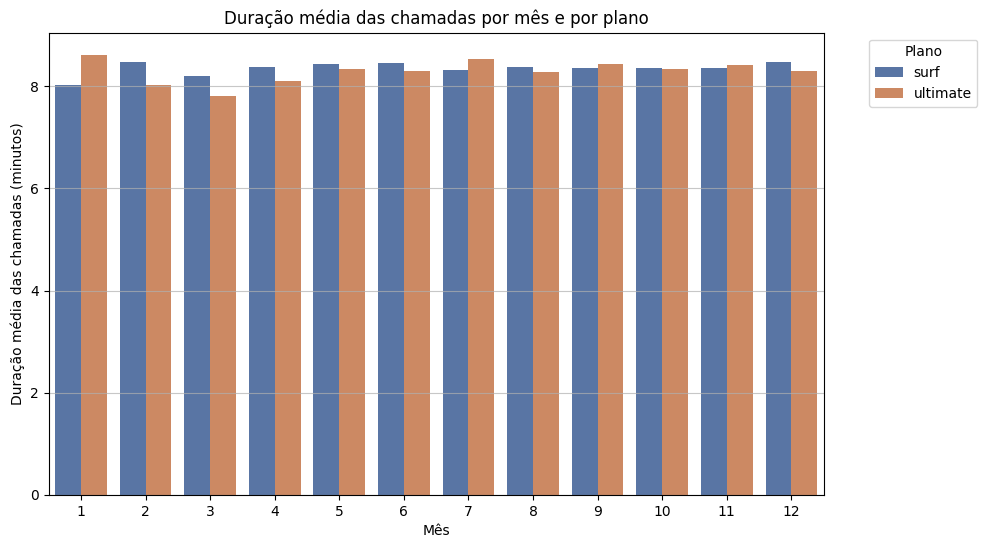

In [ ]:
##Criando um gráfico de barras para visualizar o resultado.
plt.figure(figsize=(10, 6))
sns.barplot(
    data=media_chamadas,
    x='month',
    y='avg_call_duration',
    hue='plan_name',
    palette='deep'
)

plt.title('Duração média das chamadas por mês e por plano')
plt.xlabel('Mês')
plt.ylabel('Duração média das chamadas (minutos)')
plt.legend(title='Plano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.7)
plt.show()

Observa-se que os dois planos (Surf e Ultimate) apresentam uma duração média de chamadas bastante semelhante ao longo dos meses, variando entre aproximadamente 7,5 e 8,6 minutos. O plano Ultimate apresenta médias ligeiramente maiores nos meses de Janeiro, Julho, Setembro e Novembro, ou seja, nesses meses os usuários tendem a falar um pouco mais por ligação. Já para o plano Surf, pode-se observar uma estabilidade maior comparado com o plano Ultimate, já que o plano Ultimate apresentou mais oscilações mensais.

In [ ]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [ ]:
receita_por_plano

,plan,receita
0,surf,57.293784
1,ultimate,72.116080


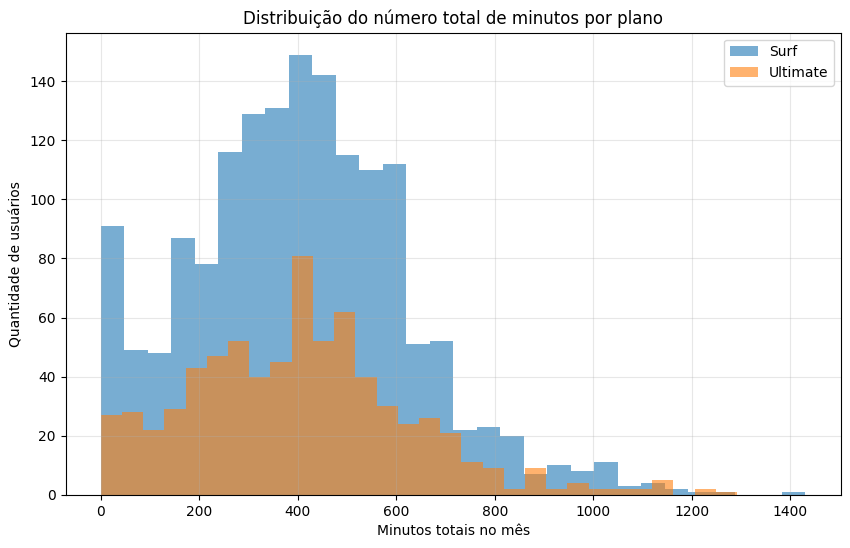

In [ ]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.
plt.figure(figsize=(10,6))

plt.hist(df_user_month[df_user_month['plan_name'] == 'surf']['minutes_total'],
         bins=30, alpha=0.6, label='Surf')

plt.hist(df_user_month[df_user_month['plan_name'] == 'ultimate']['minutes_total'],
         bins=30, alpha=0.6, label='Ultimate')

plt.title('Distribuição do número total de minutos por plano')
plt.xlabel('Minutos totais no mês')
plt.ylabel('Quantidade de usuários')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Observando o gráfico, nota-se que ambos os planos têm padrões semelhantes de uso, com a maioria dos usuários realizando entre 200 e 600 minutos de chamadas mensais.

O Plano Ultimate, embora tenha menos usuários do que o plano Surf, tem uma distribuição mais uniforme com alguns assinantes usando até acima de 1000 minutos, mostrando que ele tende a atrair clientes que falam mais no telefone e valorizam o limite mais alto do plano.
O Plano Surf tem mais usuários, apresenta uma maior concentração de usuários nessa faixa intermediária (entre 250 a 600), indicando que é mais popular entre as pessoas que fazem uso moderado dos telefonemas.

[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [ ]:
# Calcule a média e a variância da duração mensal das chamadas
df_user_month.groupby('plan_name')['minutes_total'].agg(['mean', 'var'])


,mean,var
plan_name,,
surf,404.762390,49135.104891
ultimate,406.193083,51640.971402


A variância ligeiramente maior no plano Ultimate mostra que há mais variação no comportamento dos usuários. Em relação ao volume médio de uso, observa-se que é estável entre ambos os planos.

In [ ]:
df_calls_with_plan

,id,user_id,call_date,duration,month,plan_name
0,1000_93,1000,2018-12-27,8.52,12,ultimate
1,1000_145,1000,2018-12-27,13.66,12,ultimate
2,1000_247,1000,2018-12-27,14.48,12,ultimate
3,1000_309,1000,2018-12-28,5.76,12,ultimate
4,1000_380,1000,2018-12-30,4.22,12,ultimate
...,...,...,...,...,...,...
110896,1499_199,1499,2018-11-21,8.72,11,surf
110897,1499_200,1499,2018-10-20,10.89,10,surf
110898,1499_201,1499,2018-09-21,8.12,9,surf
110899,1499_202,1499,2018-10-10,0.37,10,surf


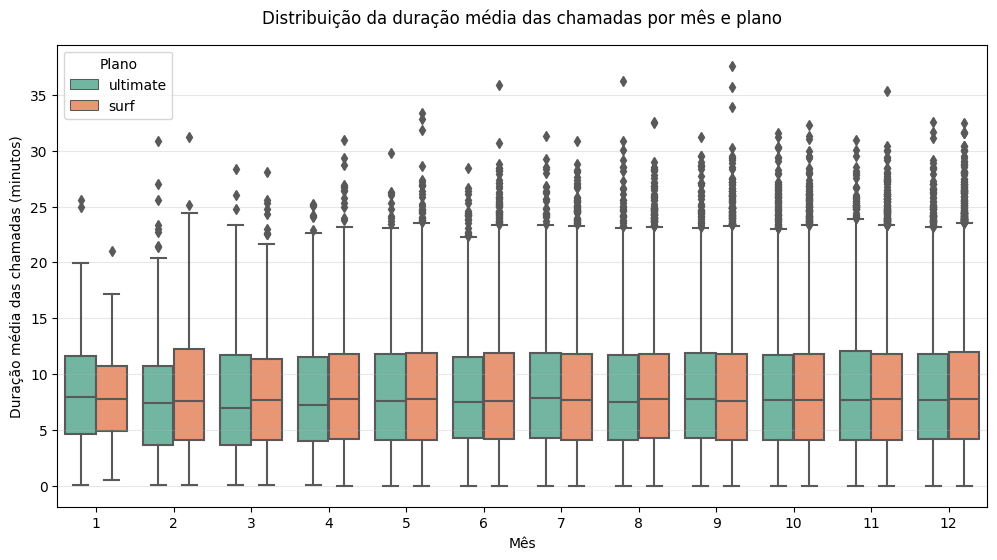

In [ ]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

plt.figure(figsize=(12,6))

sns.boxplot(
    data=df_calls_with_plan,
    x='month',
    y='duration',
    hue='plan_name',
    palette='Set2'
)

plt.title('Distribuição da duração média das chamadas por mês e plano', fontsize=12, pad=15)
plt.xlabel('Mês')
plt.ylabel('Duração média das chamadas (minutos)')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Plano')
plt.show()



- Pode-se observar um padrão bastante estável da duração de chamadas para ambos os planos. No geral, como o plano Surf apresenta uma mediana ligeiramente maior em alguns meses, seus usuários passam um pouco mais de tempo em chamadas.
- Há presença de outliers em todos os meses, representando usuários que fazem chamadas muito mais longas do que a média geral. A maior parte dos usuários fazem ligações de aproximadamente 5 a 12 minutos.
- Os outliers do plano Surf são mais frequentes e mais distantes da mediana, revelando que esse grupo possui usuários extremos, possivelmente aqueles que utilizam o telefone de forma mais intensa

### Mensagens

In [ ]:

# Adicionando o plano ao dataframe de mensagens
df_messages_with_plan = df_messages.merge(
    df_users[['user_id', 'plan']],
    on='user_id',
    how='left'
).rename(columns={'plan': 'plan_name'})

# Criar a coluna de mês
df_messages_with_plan['month'] = df_messages_with_plan['message_date'].dt.month


In [ ]:
df_messages_with_plan

,id,user_id,message_date,month,plan_name
0,1000_125,1000,2018-12-27,12,ultimate
1,1000_160,1000,2018-12-31,12,ultimate
2,1000_223,1000,2018-12-31,12,ultimate
3,1000_251,1000,2018-12-27,12,ultimate
4,1000_255,1000,2018-12-26,12,ultimate
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,ultimate
76047,1497_536,1497,2018-12-24,12,ultimate
76048,1497_547,1497,2018-12-31,12,ultimate
76049,1497_558,1497,2018-12-24,12,ultimate


In [ ]:
# Agrupando por usuário, mês e plano, contando quantas mensagens cada usuário enviou
messages_per_user_month = (
    df_messages_with_plan
    .groupby(['user_id', 'month', 'plan_name'])
    .size()
    .reset_index(name='message_count')
)

In [ ]:
messages_per_user_month

,user_id,month,plan_name,message_count
0,1000,12,ultimate,11
1,1001,8,surf,30
2,1001,9,surf,44
3,1001,10,surf,53
4,1001,11,surf,36
...,...,...,...,...
1801,1496,9,surf,21
1802,1496,10,surf,18
1803,1496,11,surf,13
1804,1496,12,surf,11


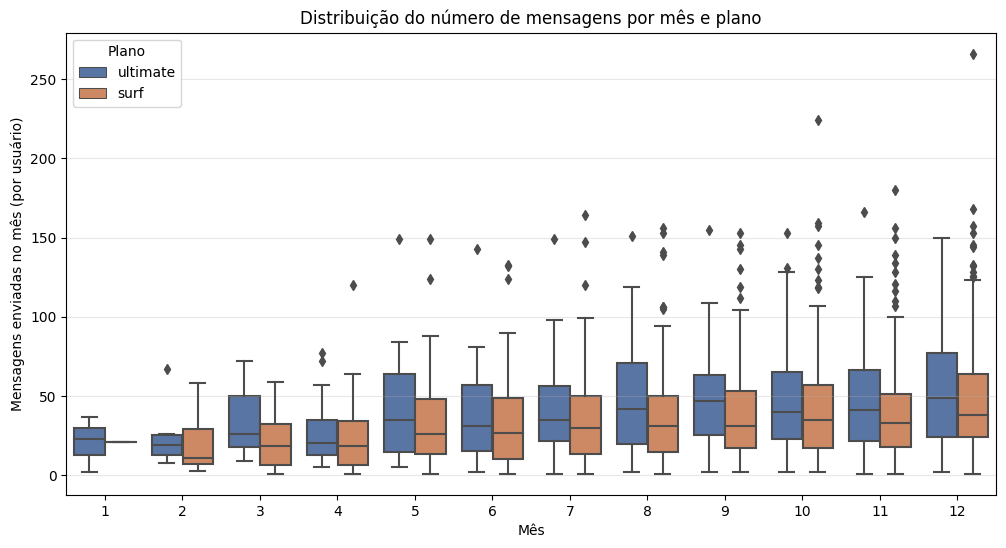

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=messages_per_user_month,
    x='month',
    y='message_count',
    hue='plan_name',
    palette='deep'
)

plt.title('Distribuição do número de mensagens por mês e plano')
plt.xlabel('Mês')
plt.ylabel('Mensagens enviadas no mês (por usuário)')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Plano')
plt.show()

- Plano Ultimate apresenta uma mediana maior em todos os meses, ou seja, os usuários desse plano enviam mais mensagens em média.
- No Plano Ultimate tem menos outliers do que no plano Surf, ou seja, no plano Surf há mais usuários que enviam quantidades muito acima da média, especialmente no 2º semestre do ano. Isso indica maior variabilidade no comportamento dos usuários do plano Surf, pois a maioria envia poucas mensagens (comparado com o plano Ultimate), mas há alguns usuários muito ativos

### Internet

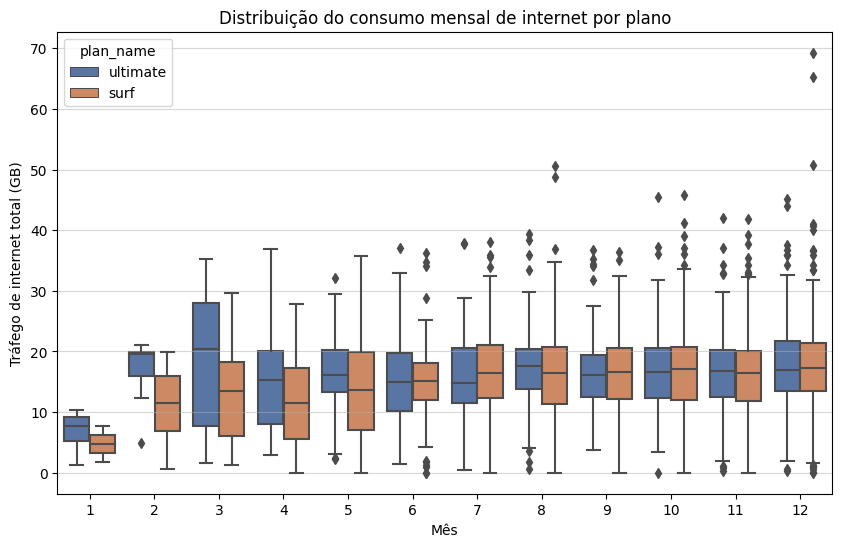

In [ ]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

plt.figure(figsize=(10, 6))

sns.boxplot(x='month', y='gb_total', hue='plan_name', data=df_user_month, palette='deep')

plt.title('Distribuição do consumo mensal de internet por plano')
plt.xlabel('Mês')
plt.ylabel('Tráfego de internet total (GB)')
plt.grid(axis='y', alpha=0.5)
plt.show()


- Plano Ultimate apresenta um uso mais estável e previsível, ou seja, limite do plano cobre bem o perfil de uso dos assinantes.
- Plano Surf mostra uma maior dispersão, ou seja, alguns consomem poucos mb de internet, enquanto outros atingem picos mais altos de mb de internet... Isso mostra que uma parte dos clientes desse plano ultrapassem o limite de pacote de dados de tráfego de internet, e pagam por valores por adicionais.
- Ambos tem uma média de tráfego de internet em gb parecidos , porém o plano Surf mostra um comportamento mais heterogêneo e tende a gerar receitas adicionais mais altas devido aos custos extras, comparado com o plano Ultimate. Logo, o comportamento é diferente sim de um plano para outro, e o plano Surf pode contribuir mais para a receita total da empresa, especialmente por conta dos usuários que ultrapassam o pacote de dados incluído.
- O pico observado no mês 3 no plano Ultimate pode estar relacionado a fatores sazonais típicos do período, como o retorno às aulas e ao trabalho, ou ainda o aumento do consumo digital durante o Carnaval. Esses eventos costumam elevar o uso de dados móveis, especialmente entre assinantes de planos mais completos, que aproveitam o pacote maior para streaming e redes sociais.


## Receita

In [ ]:
df_user_month.groupby('plan_name')['receita'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,57.293784,53.735882,20.0,20.0,36.6818,76.850586,581.328509
ultimate,720.0,72.116080,10.768848,70.0,70.0,70.0000,70.000000,178.522764


In [ ]:
#podemos comparar a média e a variância
df_user_month.groupby('plan_name')['receita'].agg(['mean', 'var'])

,mean,var
plan_name,,
surf,57.293784,2887.544971
ultimate,72.116080,115.968081


O plano surf apresenta valores médios menores e uma dispersão maior do que o plano Ultimate. Isso mostra que alguns clientes pagam apenas o valor base, enquanto vários outros excedem os limites e aumentam consequentemente seus custos.

In [ ]:
receita_por_plano_mensal

,plan,month,receita
0,surf,1,20.000000
1,surf,2,33.003956
2,surf,3,43.578788
3,surf,4,38.777485
4,surf,5,45.346471
5,surf,6,45.920653
6,surf,7,59.171272
7,surf,8,60.650127
8,surf,9,54.923685
9,surf,10,61.646473


In [ ]:
df_user_month['plan_name'].unique()

array(['ultimate', 'surf'], dtype=object)

In [ ]:
df_user_month.groupby(['month', 'plan_name'])['receita'].count()

month  plan_name
1      surf           2
       ultimate       4
2      surf           9
       ultimate       7
3      surf          23
       ultimate      12
4      surf          50
       ultimate      21
5      surf          77
       ultimate      29
6      surf          97
       ultimate      47
7      surf         121
       ultimate      59
8      surf         162
       ultimate      71
9      surf         194
       ultimate      86
10     surf         237
       ultimate     106
11     surf         283
       ultimate     127
12     surf         318
       ultimate     151
Name: receita, dtype: int64

In [ ]:
df_user_month['plan_name'].value_counts()

surf        1573
ultimate     720
Name: plan_name, dtype: int64

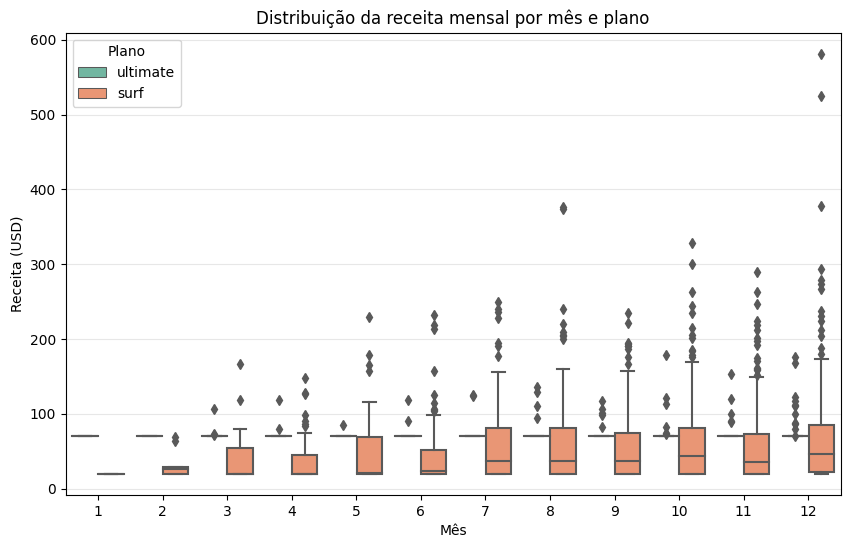

In [ ]:
##gerando o boxplot
plt.figure(figsize=(10,6))

sns.boxplot(
    x='month',
    y='receita',
    hue='plan_name',
    data=df_user_month,
    palette='Set2'
)
plt.title('Distribuição da receita mensal por mês e plano')
plt.xlabel('Mês')
plt.ylabel('Receita (USD)')
plt.legend(title='Plano')
plt.grid(axis='y', alpha=0.3)
plt.show()

O plano Ultimate apresenta uma receita fixa e estável na faixa de 70 USD, isso ocorre porque o plano já inclui uma ampla franquia de minutos, mensagens e internet, resultando em poucos ou nenhum custo adicional. Para o mês de janeiro, pode-se observar que nenhum cliente excedeu a receita de 20 USD para o plano Surf, e nenhum cliente excedeu a receita de 70 USD para o plano Ultimate

O plano Surf possui uma maior variação de receita mensal, refletindo diferenças de comportamento entre os usuários — alguns ficam dentro do pacote básico, enquanto outros ultrapassam os limites e geram custos extras.

Em termos estratégicos, o plano Ultimate garante mais estabilidade de receita do que o plano Surf.

In [ ]:
# Filtra apenas o mês de janeiro
janeiro = df_user_month[df_user_month['month'] == 1]

# Verifica se há algum cliente do plano Surf com receita > 20 USD
surf_excedeu = janeiro[(janeiro['plan_name'] == 'surf') & (janeiro['receita'] > 20)]

# Verifica se há algum cliente do plano Ultimate com receita > 70 USD
ultimate_excedeu = janeiro[(janeiro['plan_name'] == 'ultimate') & (janeiro['receita'] > 70)]

# Exibe resultados
print(f"Clientes do Surf que excederam 20 USD: {len(surf_excedeu)}")
print(f"Clientes do Ultimate que excederam 70 USD: {len(ultimate_excedeu)}")

Clientes do Surf que excederam 20 USD: 0
Clientes do Ultimate que excederam 70 USD: 0


## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]


# Teste as hipóteses

## Testando a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes
### H0 = Hipótese Nula = A RECEITA MÉDIA DOS USUÁRIOS DOS PLANOS ULTIMATE E SURF SÃO IGUAIS
### H1 = HIPÓTESE ALTERNATIVA = A RECEITA MÉDIA DOS USUÁRIOS DOS PLANOS SURF E ULTIMATE É DIFERENTE

#### Interpretação:
- Valor-p < α: Rejeitamos H₀ → médias são significativamente diferentes
- Valor-p ≥ α: Não rejeitamos H₀ → não há evidência de diferença



In [ ]:
# separando os grupos
surf = df_user_month[df_user_month['plan_name'] == 'surf']['receita']
ultimate = df_user_month[df_user_month['plan_name'] == 'ultimate']['receita']

from scipy import stats as st
alpha = 0.05 #significância de 5%

# aplicando o teste t de Student (variâncias podem ser diferentes, então vou usar equal_var=False)
results = st.ttest_ind(surf, ultimate, equal_var=False)
print('valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula (H0)")
else:
    print("Não podemos rejeitar a hipótese nula")


valor-p: 4.881852673479904e-25
Rejeitamos a hipótese nula (H0)


Isso indica que a diferença média dos usuários dos planos Surf e Ultimate é significativa.

In [ ]:
# Teste as hipóteses

## Testando a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões
### H0 = Hipótese Nula = A RECEITA MÉDIA DOS USUÁRIOS DE NY-NJ É IGUAL À DAS OUTRAS REGIÕES
### H1 = HIPÓTESE ALTERNATIVA = A RECEITA MÉDIA DOS USUÁRIOS DE NY-NJ É DIFERENTE DAS OUTRAS REGIÕES

#### Interpretação:
# - Valor-p < α: Rejeitamos H0 → há diferença significativa nas médias
# - Valor-p ≥ α: Não rejeitamos H0 → não há evidência de diferença significativa

In [ ]:
df_user_month.columns

Index(['user_id', 'month', 'minutes_total', 'contagem_messages', 'gb_total',
       'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'gb_per_month_included', 'extra_minutes',
       'extra_messages', 'extra_gb', 'custo_minutes', 'custo_messages',
       'custo_gb', 'receita'],
      dtype='object')

In [ ]:
#adicionando a coluna ' city' no df_user_month (df principal)
df_user_month = df_user_month.merge(df_users[['user_id', 'city']], on='user_id', how='left')

In [ ]:
df_users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [ ]:
# separando os grupos
ny_nj = df_user_month[df_user_month['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['receita']
outras = df_user_month[df_user_month['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['receita']

In [ ]:
ny_nj.value_counts()

20.000000     105
70.000000      56
61.004475       1
110.946973      1
41.116211       1
             ... 
122.813594      1
79.598651       1
197.733203      1
218.171060      1
40.132129       1
Name: receita, Length: 218, dtype: int64

In [ ]:
from scipy import stats as st
alpha = 0.05  # nível de significância de 5%

# aplicando o teste t de Student (variâncias podem ser diferentes)
results = st.ttest_ind(ny_nj, outras, equal_var=False)
print('valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula (H0)")
else:
    print("Não podemos rejeitar a hipótese nula (H0)")

## relembrando
### H0 = Hipótese Nula = A RECEITA MÉDIA DOS USUÁRIOS DE NY-NJ É IGUAL À DAS OUTRAS REGIÕES
### H1 = HIPÓTESE ALTERNATIVA = A RECEITA MÉDIA DOS USUÁRIOS DE NY-NJ É DIFERENTE DAS OUTRAS REGIÕES

valor-p: 0.018609472974972074
Rejeitamos a hipótese nula (H0)


Pode-se concluir que há diferença significativa entre as médias de receita dos usuários de NY-NJ e os das outras regiões

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- [x] As hipóteses nula a alternativa foram definidas
- [x] O `p-value` foi exibido
- [x] Os testes de hipótese foram executados corretamente
</div>

## Conclusão geral

Após a análise completa dos dados de uso dos clientes da empresa de telecomunicações *Megaline*, foi possível observar diferenças claras no comportamento entre os planos Surf e Ultimate.

Chamadas: ambos os planos apresentam tempos médios de ligação semelhantes, porém o plano Ultimate demonstra uso mais estável e previsível, enquanto o Surf possui maior variação entre os usuários.

Mensagens e Internet: os clientes do plano Surf tendem a ultrapassar com mais frequência os limites de mensagens e dados incluídos, gerando cobranças adicionais e maior dispersão no consumo. Já o Ultimate concentra um uso mais equilibrado.

Receita: estatisticamente, a receita média do Ultimate é significativamente superior à do Surf, confirmando que este plano gera mais receita de forma consistente.

Regiões (NY-NJ): não foi encontrada diferença significativa na receita média entre os clientes da região de NY-NJ e os das demais áreas, sugerindo que o comportamento regional não afeta diretamente o faturamento.

Em suma, o plano Ultimate é o mais rentável e estável, enquanto o plano Surf apresenta maior variabilidade e potencial de receita adicional por excedentes, mas com menos previsibilidade.
Essas informações podem orientar a alocação do orçamento de marketing e futuras decisões sobre posicionamento de planos e pacotes de serviços.